<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical
from keras.utils import to_categorical
 # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [ ]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [ ]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

In [ ]:
df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

In [ ]:
df2 = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Survived', 'Parch']]

In [ ]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

In [ ]:
df2 = df2.dropna()

In [ ]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar

In [ ]:
print('datos para el analisis:', df2.shape[0])

datos para el analisis: 714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

In [ ]:
df2.head()

,Pclass,Sex,Age,SibSp,Survived,Parch
0,3,male,22.0,1,0,0
1,1,female,38.0,1,1,0
2,3,female,26.0,0,1,0
3,1,female,35.0,1,1,0
4,3,male,35.0,0,0,0


In [ ]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó

In [ ]:
df2['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

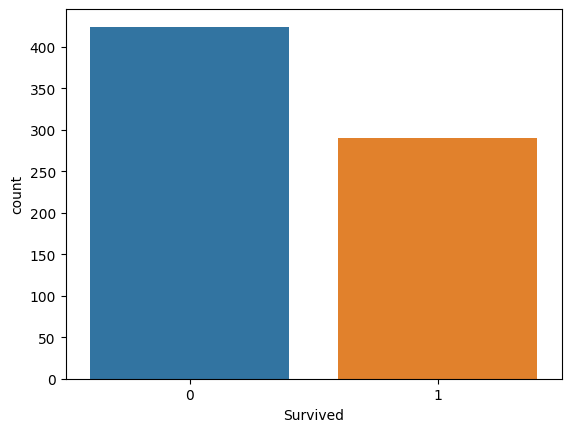

In [ ]:
ax = sns.countplot(data=df2, x='Survived')

In [ ]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

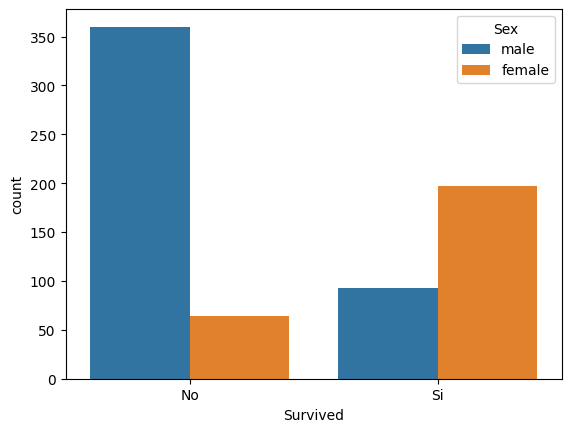

In [ ]:
ax = sns.countplot(x=df2['Survived'].replace({0: 'No', 1: 'Si'}), hue=df2['Sex'])

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

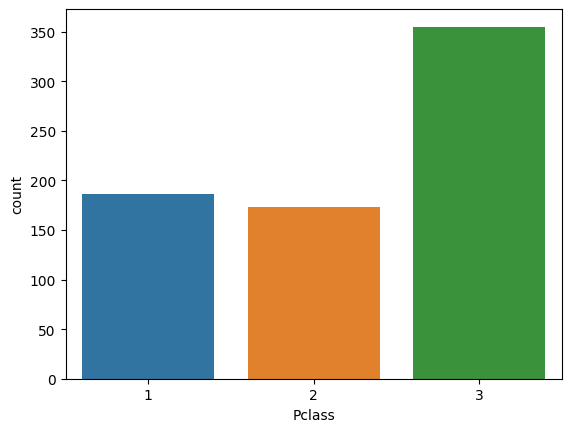

In [ ]:
ax = sns.countplot(data=df2, x='Pclass')

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

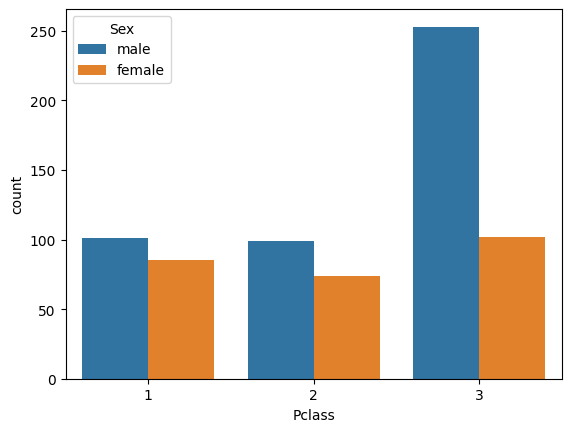

In [ ]:
ax = sns.countplot(data=df2, x='Pclass', hue='Sex')

#### Transformar variables categóricas texto a clases numeradas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

In [ ]:
df_cod = df2.copy()

In [ ]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

In [ ]:
le = LabelEncoder()
label_encoding = le.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoding
df_cod.head()

,Pclass,Sex,Age,SibSp,Survived,Parch
0,3,1,22.0,1,0,0
1,1,0,38.0,1,1,0
2,3,0,26.0,0,1,0
3,1,0,35.0,1,1,0
4,3,1,35.0,0,0,0


In [ ]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
# Alumno: Analizar la distribución de la edad

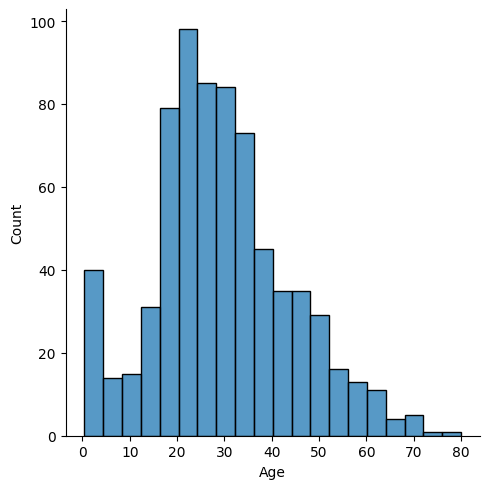

In [ ]:
sns.displot(x=df_cod['Age'])

In [ ]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

In [ ]:
df_norm = df_cod.copy()

In [ ]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm.loc[:, 'Age'] = scaler.fit_transform(df_norm[['Age']])
df_norm.head()


,Pclass,Sex,Age,SibSp,Survived,Parch
0,3,1,-0.530377,1,0,0
1,1,0,0.571831,1,1,0
2,3,0,-0.254825,0,1,0
3,1,0,0.365167,1,1,0
4,3,1,0.365167,0,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [ ]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

In [ ]:
X = df_norm.drop('Survived', axis=1).values
y = df_norm['Survived'].values

In [ ]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape

In [ ]:
in_shape = X.shape[1]
in_shape

5

In [ ]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea

In [ ]:
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [ ]:
# Alumno, generar los dataset de train y test superando en 80%20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

In [ ]:
model = Sequential()

model.add(Dense(units=66, activation='sigmoid', input_shape=(in_shape,)))
model.add(Dense(units=out_shape, activation='sigmoid'))

In [ ]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"

In [ ]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"

In [ ]:
 history = model.fit(X_train, y_train, validation_split=0.2, epochs=80)

Epoch 1/80
15/15 [==============================] - 1s 28ms/step - loss: 0.7007 - accuracy: 0.6009 - val_loss: 0.7084 - val_accuracy: 0.5478
Epoch 2/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6737 - accuracy: 0.6009 - val_loss: 0.6878 - val_accuracy: 0.5478
Epoch 3/80
15/15 [==============================] - 0s 7ms/step - loss: 0.6609 - accuracy: 0.6009 - val_loss: 0.6826 - val_accuracy: 0.5478
Epoch 4/80
15/15 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.6009 - val_loss: 0.6765 - val_accuracy: 0.5478
Epoch 5/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6428 - accuracy: 0.5987 - val_loss: 0.6668 - val_accuracy: 0.5478
Epoch 6/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6338 - accuracy: 0.6031 - val_loss: 0.6594 - val_accuracy: 0.5391
Epoch 7/80
15/15 [==============================] - 0s 6ms/step - loss: 0.6265 - accuracy: 0.6184 - val_loss: 0.6539 - val_accuracy: 0.5391
Epoch 8/80
15/15 [=

In [ ]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line

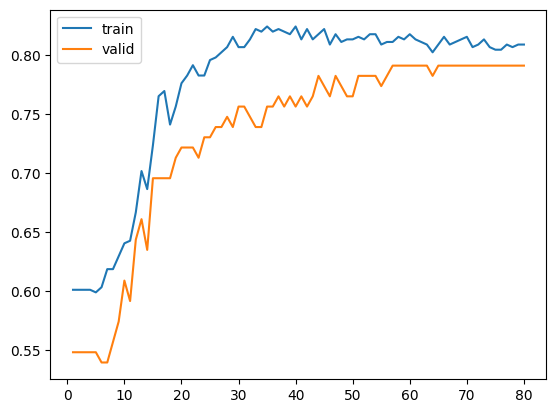

In [ ]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='valid')
plt.show()

In [ ]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test

In [ ]:
y_hat_prob = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat

In [ ]:
y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [ ]:
# Alumno, calcular la exactitud (accuracy) de su modelo

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.7412587412587412

In [ ]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']

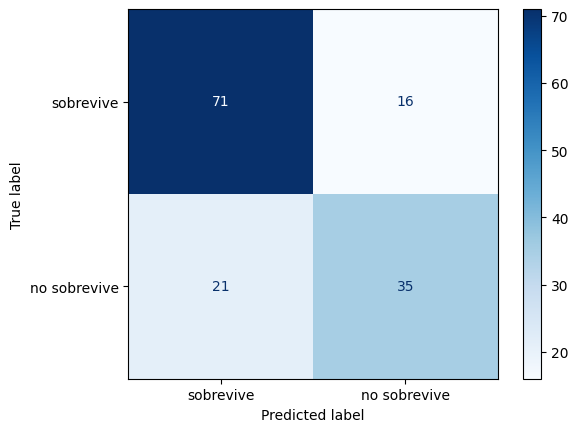

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['sobrevive', 'no sobrevive'])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [ ]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo

In [ ]:
Pclass = 2
Sex = 'female'
Age = 100
SibSp = 1
parch = 0

sex_encoded = int(le.transform([Sex]))
age_norm = float(scaler.transform([[Age]]))
X_prueba = np.array([Pclass, sex_encoded, age_norm, SibSp, parch])
X_prueba = X_prueba.reshape(1, -1)
y_prueba = float(model.predict(X_prueba))

if y_prueba >= 0.5:
  print('felicidades, quiza llegues a viej@')

else:
  print('valiste madres')


print('posibilidades de no haber muerto:', y_prueba)

1/1 [==============================] - 0s 24ms/step
valiste madres
posibilidades de no haber muerto: 0.20543578267097473


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
